In [2]:
# This is a version of the Raman gain coefficient script for the 50 km fibre span
# The same script was utilised for the 25 km
# Author: Emmanuel Akinrintoyo


In [7]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot


# convert the power values in dBm
def dBmToWatts(values):
    conversion = (10 ** (values/10)) / 1000
    return conversion


# convert the inputted dB values to absolute
def convert2Linear(values):
    return np.power(10, (values / 10))


# generate the wavelength values
def convertToWavelength(values):
    fr = 191400
    c = 299792458
    fr_arr = []
    wavelengths = []
    for i in range(0, 90):
        val = (fr + (i * 50)) * (1e9)
        fr_arr.append(val)
        wavelengths.append((c / val) * (1e9))
    return wavelengths


# function for plotting the figures
def plotFigure(fig, title, xlabel, ylabel, font_size, ylim=None):
    plt.plot(fig[0], fig[1], linewidth=2)
    plt.ylim(ylim)
    plt.title(title, fontsize=font_size, fontname="Arial")
    plt.xlabel(xlabel, fontsize=font_size, fontname="Arial")
    plt.ylabel(ylabel, fontsize=font_size, fontname="Arial")
    title = title.replace(" ", "_") + str(font_size)
    plt.savefig(title, dpi=900, bbox_inches="tight")


90

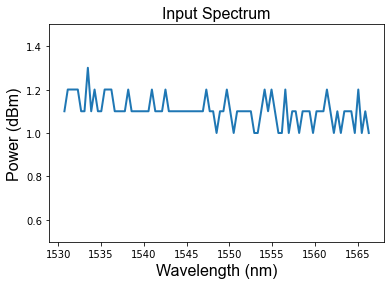

In [8]:
input_spectrum = [1.0, 1.1, 1.0, 1.2, 1.0, 1.1, 1.1, 1.1, 1.0, 1.1, 1.0, 1.1,
                  1.2, 1.1, 1.1, 1.1, 1.0, 1.1, 1.1, 1.1, 1.0, 1.1, 1.1, 1.0,
                  1.2, 1.0, 1.0, 1.1, 1.2, 1.1, 1.2, 1.1, 1.0, 1.0, 1.1, 1.1,
                  1.1, 1.1, 1.1, 1.0, 1.1, 1.2, 1.1, 1.1, 1.0, 1.1, 1.1, 1.2,
                  1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2,
                  1.1, 1.1, 1.1, 1.2, 1.1, 1.1, 1.1, 1.1, 1.1, 1.1, 1.2, 1.1,
                  1.1, 1.1, 1.1, 1.2, 1.2, 1.2, 1.1, 1.1, 1.2, 1.1, 1.3, 1.1,
                  1.1, 1.2, 1.2, 1.2, 1.2, 1.1]

input_spectrum_wav = convertToWavelength(input_spectrum)
fig1 = [input_spectrum_wav, input_spectrum]
plotFigure(fig1, "Input Spectrum", "Wavelength (nm)", "Power (dBm)", 16,
           ylim=[0.5, 1.5])
len(input_spectrum)


mean_input_power:  0.20666666666666672


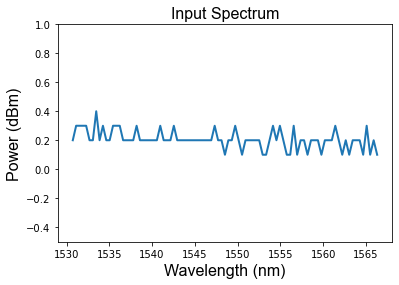

In [9]:
input_spectrum = np.array(input_spectrum)

# compensate for Dicon switch loss
adjusted_input_power_levels = input_spectrum - 0.9

# get 90 values from the set of 95
adjusted_input_pow_level_wav = convertToWavelength(adjusted_input_power_levels)

# plot the input spectrum after accounting for the Dicon switch loss
fig = [adjusted_input_pow_level_wav, adjusted_input_power_levels]
plotFigure(fig, 'Input Spectrum', "Wavelength (nm)", "Power (dBm)", 16,
           ylim=[-0.5, 1])

adjusted_input_power_levels = adjusted_input_power_levels
mean_input_power = np.mean(adjusted_input_power_levels)
print("mean_input_power: ", mean_input_power)


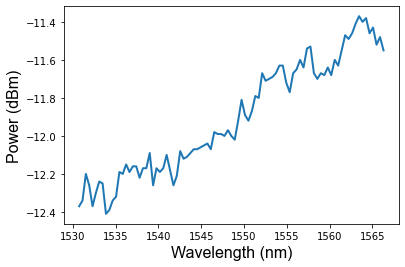

In [11]:
# average of the runs for 50 km span
output_spectrum = [-11.55, -11.48, -11.520000000000001, -11.43,
                   -11.459999999999999, -11.38, -11.400000000000002,
                   -11.370000000000001, -11.41, -11.460000000000003, -11.49,
                   -11.470000000000002, -11.55, -11.629999999999999,
                   -11.599999999999998, -11.68, -11.639999999999999,
                   -11.679999999999998, -11.669999999999998, -11.7, -11.67,
                   -11.530000000000001, -11.54, -11.639999999999999,
                   -11.599999999999998, -11.65, -11.669999999999998, -11.77,
                   -11.719999999999999, -11.629999999999999,
                   -11.629999999999999, -11.669999999999998, -11.69, -11.7,
                   -11.71, -11.669999999999998, -11.8, -11.790000000000001,
                   -11.870000000000001, -11.92, -11.890000000000002, -11.81,
                   -11.919999999999998, -12.02, -12.000000000000002,
                   -11.970000000000002, -12.0, -11.99, -11.99, -11.98,
                   -12.069999999999999, -12.040000000000001, -12.05,
                   -12.059999999999999, -12.069999999999999,
                   -12.069999999999999, -12.09, -12.11, -12.12,
                   -12.079999999999998, -12.209999999999999, -12.26, -12.18,
                   -12.099999999999998, -12.169999999999998, -12.19,
                   -12.169999999999998, -12.26, -12.089999999999998,
                   -12.169999999999998, -12.169999999999998, -12.22, -12.16,
                   -12.16, -12.190000000000001, -12.149999999999999, -12.2,
                   -12.19, -12.32, -12.34, -12.39, -12.41, -12.25,
                   -12.239999999999998, -12.3, -12.370000000000001, -12.26,
                   -12.2, -12.34, -12.370000000000001]

output_spectrum_wav = convertToWavelength(output_spectrum)
fig2 = [output_spectrum_wav, output_spectrum]

plotFigure(fig2, "", "Wavelength (nm)", "Power (dBm)", 16)
len(output_spectrum)
plt.savefig("raman50.eps", format='eps',  dpi=900, bbox_inches='tight')


In [12]:
# wavelength dependent loss
fibre_wdl = [0.20876, 0.20883, 0.20889, 0.20895, 0.20901, 0.20907, 0.20913,
             0.20919, 0.20925, 0.20932, 0.20938, 0.20944, 0.2095, 0.20956,
             0.20962, 0.20968, 0.20974, 0.2098, 0.20986, 0.20992, 0.20998,
             0.21005, 0.21011, 0.21017, 0.21023, 0.21029, 0.21035, 0.21041,
             0.21047, 0.21053, 0.21059, 0.21065, 0.21071, 0.21077, 0.21083,
             0.21089, 0.21095, 0.21102, 0.2111, 0.21118, 0.21126, 0.21134,
             0.21142, 0.2115, 0.21158, 0.21166, 0.21174, 0.21182, 0.2119,
             0.21198, 0.21206, 0.21214, 0.21222, 0.21229, 0.21237, 0.21245,
             0.21253, 0.21261, 0.21269, 0.21277, 0.21285, 0.21293, 0.21301,
             0.21309, 0.21317, 0.21325, 0.21333, 0.2134, 0.21348, 0.21356,
             0.21364, 0.21372, 0.2138, 0.21388, 0.21396, 0.21404, 0.21411,
             0.21419, 0.21427, 0.21435, 0.21443, 0.21451, 0.21459, 0.21466,
             0.21474, 0.21482, 0.2149, 0.21498, 0.21508, 0.2152]

fibre_wdl = np.array(fibre_wdl)
len(fibre_wdl)


90

In [13]:
length = 50000  # span length
fibre_attenuation = fibre_wdl / 1000  # fiber attenuation in decibels/km
alpha = fibre_attenuation / (20 * np.log10(np.e))

# effective length
L_eff = (1 - np.exp(- 2 * alpha * length)) / (2 * alpha)
L_eff[0:4]


array([18922.75372439, 18917.9254084 , 18913.78845652, 18909.6529852 ])

[-11.65, -11.68, -11.620000000000001, -11.73, -11.559999999999999]


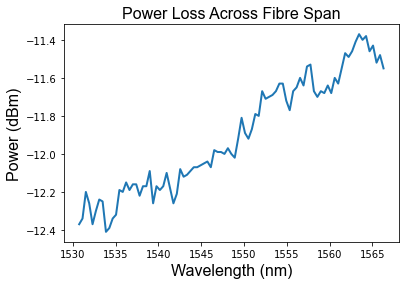

In [14]:
power_loss = []
for i in range(0, 90):
    power_diff = output_spectrum[i] - adjusted_input_power_levels[i]
    power_loss.append(power_diff)

print(power_loss[0:5])

# plot the values
power_loss_wav = convertToWavelength(power_loss)
fig3 = [power_loss_wav, output_spectrum]
plotFigure(fig3, "Power Loss Across Fibre Span", "Wavelength (nm)",
           "Power (dBm)", 16)


In [15]:
power_loss = np.array(power_loss)
power_loss_lin = convert2Linear(power_loss)
print(power_loss_lin[0:5])


[0.06839116 0.06792036 0.06886523 0.06714289 0.06982324]


In [16]:
fr = 191400
freq_values = []
for i in range(0, 90):
    lamda_val = (fr + (i * 50)) * (1e9)
    freq_values.append(lamda_val)
freq_values = np.array(freq_values)

# convert the input power values
adjusted_input_pow_lvls_lin = dBmToWatts(np.array(adjusted_input_power_levels))
x = adjusted_input_pow_lvls_lin
y = power_loss_lin
params = [L_eff, freq_values, x]

# display the frequency values
freq_values[0:3]


array([1.9140e+14, 1.9145e+14, 1.9150e+14])

In [17]:
# Zirngibl's model
def objectiveFunction(params, B):
    # B - Raman gain coefficient
    min_range = 191.400e12  # 191.450 THz
    max_range = 195.850e12  # 195.900 THz
    range_diff = max_range - min_range

    L_eff, freq_values, x = params[0], params[1], params[2]
    x = np.sum(x)  # sum of the total input power
    raman_num = B * x * L_eff * range_diff * np.exp(B * x * L_eff *
                                                    (freq_values - min_range))
    raman_den = np.exp(B * x * L_eff * (range_diff)) - 1
    raman = raman_num / raman_den

    return raman

popt, _ = curve_fit(f=objectiveFunction, xdata=params, ydata=power_loss_lin,
                    maxfev=4000, p0=[1e-15])
beta = popt
print("Beta (cmWHz)^-1: ", beta)


Beta (cmWHz)^-1:  [8.16357809e-19]
